In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import brands
from latex_conf import build_latex_confusion_matrix

import util

In [2]:
base_path_phish = "../../PHISHPEDIA/Phishpedia/phishpedia/datasets/phish_sample_30k"
base_path_benign = "../../PHISHPEDIA/Phishpedia/phishpedia/datasets/benign_sample_30k"

In [3]:
df_phish = pd.read_csv("result_v2_opti2.txt", sep="\t")
df_phish["is_phish"] = 1
df_benign = pd.read_csv("result_v2_benign_opti2.txt", sep="\t")
df_benign["is_phish"] = 0

df_phish = df_phish[df_phish['true_brand'].isin(brands.brands)]
df_benign = df_benign.iloc[:19000, :]

df = df_phish.append(df_benign, ignore_index=True)

df_phish_old = df_phish
df_phish["phish_category"] = np.where(df_phish['true_brand'] == df_phish['pred_brand'], 1, 0)
df_rec = df_phish.append(df_benign, ignore_index=True)

/tmp/ipykernel_135246/3379090200.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_phish.append(df_benign, ignore_index=True)
/tmp/ipykernel_135246/3379090200.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_rec = df_phish.append(df_benign, ignore_index=True)


In [4]:
print(f"Phishing sites: {df_phish.shape}")
print(f"Legit sites: {df_benign.shape}")
print(f"Dataframe sites: {df.shape}")

Phishing sites: (18432, 7)
Legit sites: (19000, 7)
Dataframe sites: (37432, 7)


In [5]:
confusion_matrix = pd.crosstab(df['is_phish'], df['phish_category'], rownames=['Actual'], colnames=['Predicted'], margins=True)
confusion_matrix_rec = pd.crosstab(df_rec['is_phish'], df_rec['phish_category'], rownames=['Actual'], colnames=['Predicted'], margins=True)

In [6]:
confusion_matrix

Predicted,0,1,All
Actual,,,
0,12606,6394,19000
1,11670,6762,18432
All,24276,13156,37432


In [7]:
confusion_matrix_rec

Predicted,0,1,All
Actual,,,
0,12606,6394,19000
1,16975,1457,18432
All,29581,7851,37432


In [8]:
util.precision_sensitivity(confusion_matrix, confusion_matrix_rec)

Precision: 0.513986013986014, Precision brand: 0.18558145459177175
Sensitivity: 0.3668619791666667, Sensitivity brand: 0.07904730902777778


# Error Details

## False Negatives

In [9]:
fn = df[(df['phish_category'] == 0) & (df['is_phish'] == 1)]
print(fn.shape)

(11670, 7)


['../../PHISHPEDIA/Phishpedia/phishpedia/datasets/phish_sample_30k/Maersk+2020-05-27-11`40`18/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/phish_sample_30k/Banco del Estado de Chile+2020-09-09-11`47`43/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/phish_sample_30k/Orange+2020-09-27-10`58`51/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/phish_sample_30k/PayPal Inc.+2020-07-19-14`10`26/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/phish_sample_30k/AT&T Inc.+2020-08-21-15`19`04/shot.png']

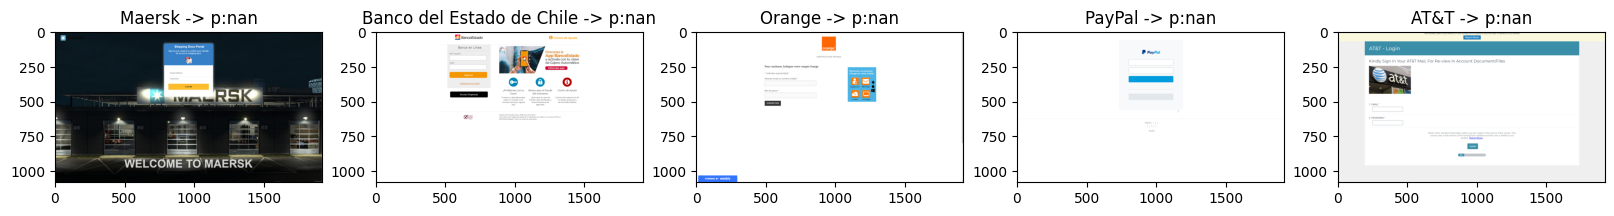

In [18]:
util.print_some_errors(fn, base_path_phish)

## False Positives

In [11]:
fp = df[(df['phish_category'] == 1) & (df['is_phish'] == 0)]
print(fp.shape)

(6394, 7)


['../../PHISHPEDIA/Phishpedia/phishpedia/datasets/benign_sample_30k/abvv.be/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/benign_sample_30k/webtoonguide.com/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/benign_sample_30k/imagecollect.com/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/benign_sample_30k/cubeskills.com/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/benign_sample_30k/trabber.es/shot.png']

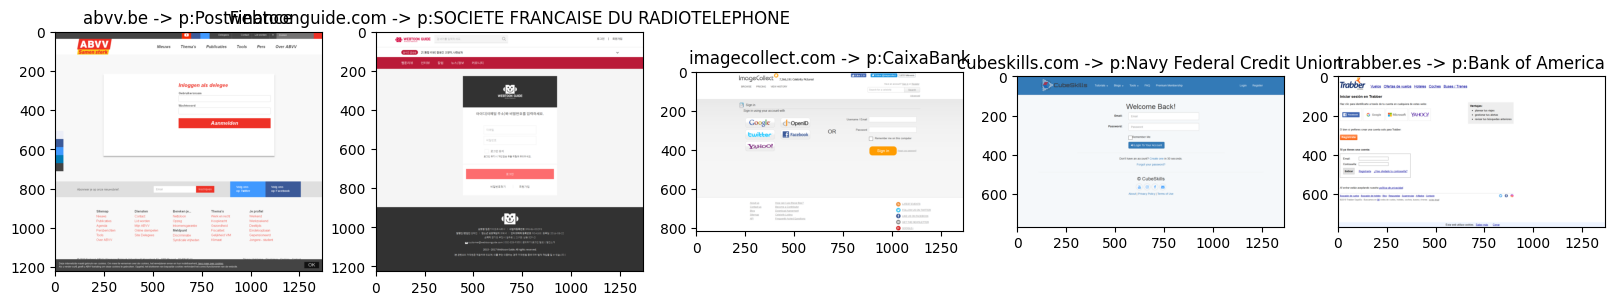

In [12]:
util.print_some_errors(fp, base_path_benign)

## True Positive - False Brand detection

In [13]:
brand_err = df_phish_old[(df_phish_old['true_brand'] != df_phish_old['pred_brand']) & df_phish_old['pred_brand']]
print(brand_err.shape)

(5305, 7)


['../../PHISHPEDIA/Phishpedia/phishpedia/datasets/phish_sample_30k/M & T Bank Coporation+2020-08-11-14`39`58/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/phish_sample_30k/PayPal Inc.+2020-07-05-10`20`56/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/phish_sample_30k/Alibaba+2020-07-28-21`29`17/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/phish_sample_30k/PayPal Inc.+2020-09-23-20`16`43/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/phish_sample_30k/Instagram+2020-08-24-10`37`43/shot.png']

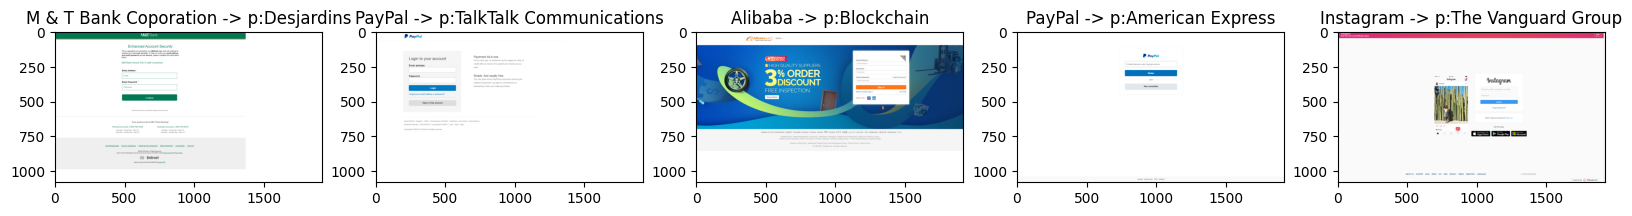

In [14]:
util.print_some_errors(brand_err, base_path_phish)

In [15]:
examples_fn = [
    "phish_sample_30k/Instagram+2020-08-18-10`45`48/shot.png",
    "phish_sample_30k/WeTransfer+2020-05-29-12`53`50/shot.png",
    "phish_sample_30k/Orange+2020-09-24-19`16`09/shot.png",
    "phish_sample_30k/Chase Personal Banking+2020-08-18-13`05`21/shot.png",
    "phish_sample_30k/Global Sources (HK)+2020-07-20-13`02`55/shot.png",
    "phish_sample_30k/Bank of America+2020-08-13-19`32`30/shot.png",
    "phish_sample_30k/Webmail Providers+2020-06-08-09`49`15/shot.png",
    "phish_sample_30k/GoDaddy+2019-08-20-12`41`23/shot.png"
]

examples_fp = [
    "benign_sample_30k/tvn.pl/shot.png",
    "benign_sample_30k/megapixel.cz/shot.png",
    "benign_sample_30k/jumoreglobal.com/shot.png",
    "benign_sample_30k/galianostore.com/shot.png",
    "benign_sample_30k/cubecraft.net/shot.png",
    "benign_sample_30k/northernbrewer.com/shot.png",
    "benign_sample_30k/thinkorswim.com/shot.png",
    "benign_sample_30k/ksk-melle.de/shot.png"
]

examples_false_brand = [
    "phish_sample_30k/WeTransfer+2019-10-23-05`51`44/shot.png",
    "phish_sample_30k/WhatsApp+2020-09-14-16`05`03/shot.png",
    "phish_sample_30k/Blockchain+2020-08-25-12`26`50/shot.png",
    "phish_sample_30k/AT&T Inc.+2020-07-14-11`18`23/shot.png",
    "phish_sample_30k/WeTransfer+2019-10-19-11`45`07/shot.png",
    "phish_sample_30k/Mastercard International Incorporated+2020-09-12-12`01`42/shot.png",
    "phish_sample_30k/Orange+2020-09-15-12`59`07/shot.png",
    "phish_sample_30k/Adobe Inc.+2020-05-10-18`21`05/shot.png"
]

# Statistic for Latex

In [16]:
print(build_latex_confusion_matrix(confusion_matrix))

\def \cTP {6762}
\def \cFP {6394}
\def \cTN {12606}
\def \cFN {11670}
\def \ctiP {18432}
\def \ctiN {19000}
\def \ctpP {13156}
\def \cFpN {24276}
\def \ctotal {37432}
\def \cPPV {51.4\%}
\def \cTPR {36.7\%}
\def \cACC {51.7\%}



In [17]:
print(build_latex_confusion_matrix(confusion_matrix_rec))

\def \cTP {1457}
\def \cFP {6394}
\def \cTN {12606}
\def \cFN {16975}
\def \ctiP {18432}
\def \ctiN {19000}
\def \ctpP {7851}
\def \cFpN {29581}
\def \ctotal {37432}
\def \cPPV {18.6\%}
\def \cTPR {7.9\%}
\def \cACC {37.6\%}

